# [E-02] Classification with ScikitLearn

### 목차

#### 1. 들어가며..   
  1-1. Toy Datasets  
  1-2. 분류기 모델  
  1-3. 오차 행렬  
  1-4. 분류 모델의 성능을 평가하는 지표  
  1-5. 사전 준비


#### 2. 3가지 분류   
  2-1. load_digits : 손글씨 분류   
  2-2. load_wind : 와인 분류    
  2-3. load_breast_cancer : 유방암 여부 진단  
  
  *** 각 분류 모델별로 아래와 같은 항목을 포함합니다**
    1. 데이터 준비     
    2. 데이터 이해하기          
    3. train, test 데이터 분리      
    4. 다양한 모델로 학습시켜보기    
    5. 모델 평가하기    
    
    
#### 3. 최종 평가  


#### 4. 회고  


### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
|2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음|
|3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함|

<br>
<br>

---


### 1. 들어가며

#### 1-1. Toy datasets 
  * 🔗<a href="https://scikit-learn.org/stable/datasets/toy_dataset.html">Scikit-Learn Toy Datasets </a>
  * datasets.load_breast_cancer(): 분류 문제, 유방암 판별  
  * datasets.load_digits(): 분류 문제, 0 ~ 9 숫자 분류  
  * datasets.load_iris(): 분류 문제, iris 품종 분류  
  * datasets.load_wine(): 분류 문제, 와인 분류  


#### 1-2. 분류기 모델
  * Decision Tree: 의사결정나무
  * Random Forest: 랜덤 포레스트
  * SVM: 서포트 벡터 머신 
  * SGD Classifier: 확률적 경사하강법
  * Logistic Regression: 로지스틱 회귀


#### 1-3. 오차행렬 (Confusion Matrix, 혼동 행렬)
  * TP(True Positive): 실제 Positive인 정답을 Positive라고 예측 (True)
  * TN(True Negative): 실제 Negative인 정답을 Negative라고 예측 (True)
  * FP(False Positive): 실제 Negative인 정답을 Positive라고 예측 (False) – Type I error
  * FN(False Negative): 실제 Positive인 정답을 Negative라고 예측 (False) – Type II error

#### 1-4. 분류 모델의 성능을 평가하는 지표
  * 정확도    
    * 전체 예측 건수에서 정답을 맞힌 건수의 비율 (Positive, Negative 상관없음! 맞히기만 하면 됨)
    * 정확도 역설(Accuracy Paradox)에 주의하여 재현율(Recall)도 함께 평가지표로 사용
    
    
  * 재현율(Recall)    
    * 실제로 정답이 True인 것들 중에서 분류기가 True 로 예측한 비율
    * 애초에 True가 발생하는 확률이 적을 때 사용하면 좋음
    
    
  * 정밀도(Precision)     
    * 양성 클래스라고 예측한 것 중에서 얼마나 잘 맞았는지 비율
    * Positive로 예측한 것 중에서 실제로 True로 예측한 비율 
    
    
  * F1 Score
    * Recall과 Precision은 반대 개념의 지표. Precision과 Recall 모두 유용한 지표이지만 한계가 있고, 그 둘의 조화 평균이 바로 F1 Score


  * 💡classification_report 뜯어보기
    * support: 각 클래스별 데이터 개수
    * macro avg: 각 클래스에 대한 f1-score 계산 후, 단순 산술 평균을 내어 구한 f1-score
    * weighted avg: 각 클래스에 대한 f1-score 계산 후, 각 클래스별 데이터 비율에 따른 가중 평균을 내어 구한 f1-score
    * None: 총합한 f1-score가 아닌 각 클래스별 f1-score를 리턴
    * micro: 전체 클래스에 계산. 각 클래스에 대한 TP/FP/FN을 합한 뒤에 f1-score 계산
    
    
  * **프로젝트에서 어떤 부분이 더 중요한지를 잘 판단하여 모델을 평가할 때 어떤 지표를 우선시할지 결정해야함!**
  
  
#### 1-5. 사전 준비


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# 분류 모델 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
svm_model = svm.SVC()
sgd_model = SGDClassifier()
logistic_model = LogisticRegression(solver='lbfgs', max_iter=3400)



* 필요한 클래스 및 모듈 모두 import

---


## 2-1. load_digits : 손글씨 분류

### A. 데이터 준비

In [2]:
# load_digits 손글씨 분류 데이터 가져오기
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
print(dir(digits))
print(digits.keys())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
digits_data = digits.data
print(digits_data.shape)
print(digits_data[0])

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [5]:
digits_label = digits.target
print(digits_label.shape)
print(digits_label)

(1797,)
[0 1 2 ... 8 9 8]


In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### B. 데이터 이해하기

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### C. train, test 데이터 분리


In [9]:
# 손글씨 분류 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=32)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))


X_train 개수:  1437 , X_test 개수:  360


### D. 다양한 모델로 학습시켜보기

In [10]:
# Decision Tree

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.75      0.83      0.79        36
           2       0.75      0.84      0.79        32
           3       0.92      0.86      0.89        56
           4       0.85      0.90      0.88        31
           5       0.92      0.97      0.95        36
           6       0.97      0.94      0.96        34
           7       0.94      0.88      0.91        34
           8       0.88      0.78      0.82        27
           9       0.79      0.83      0.81        36

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.88       360



In [11]:
# Random Forest

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        36
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        34
           8       0.96      0.89      0.92        27
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360



In [12]:
# SVM

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       0.95      1.00      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [13]:
# SGDClassifier

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      0.94      0.96        36
           2       1.00      1.00      1.00        32
           3       0.98      0.98      0.98        56
           4       1.00      0.97      0.98        31
           5       0.92      0.97      0.95        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.93      0.96      0.95        27
           9       0.94      0.94      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



In [14]:
# Logistic Regression

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.94      0.94      0.94        36
           2       1.00      1.00      1.00        32
           3       1.00      0.98      0.99        56
           4       1.00      0.97      0.98        31
           5       0.94      0.94      0.94        36
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        34
           8       0.96      0.96      0.96        27
           9       0.92      1.00      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



### E. 모델 평가하기

#### 모델의 성능을 평가하는 지표, Accuracy & Recall
분류를 정확하게 했는지 정확도를 볼 수 있는 **Accuracy**와 정확도의 역설에 주의하며 실제로 잘 분류된 숫자를 모델이 잘 예측했는지에 대한 비율인 **Recall** 도 함께 평가하는 지표로 사용해야 합니다. 

#### **Accuracy**
* Decision Tree: 88% 
* Ramdom Forest: 99%
* SVM: 99%
* SGDClassifier: 96%
* Logistic Regression: 97%

#### **Recall**
* Decision Tree: 87% 
* Ramdom Forest: 98%
* SVM: 99%
* SGDClassifier: 94%
* Logistic Regression: 97%

#### 결론
Accuracy와 Recall 모두 80%대인 Decision Tree를 제외하고는 네 가지 모델의 성능이 모두 우수하다고 생각합니다. 

---


## 2-2. load_wine : 와인 분류

### A. 데이터 준비

In [15]:
from sklearn.datasets import load_wine

In [16]:
wine = load_wine()
print(dir(wine))
print(wine.keys())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [17]:
wine_data = wine.data
print(wine_data.shape)
print(wine_data[0])

(178, 13)
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [18]:
wine_label = wine.target
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### B. 데이터 이해하기

In [20]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [21]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### C. train, test 데이터 분리

In [22]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=32)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


### D. 다양한 모델로 학습시켜보기

In [23]:
# Decision Tree

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36



In [24]:
# Random Forest

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [25]:
# SVM

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.41      0.90      0.56        10
           2       0.00      0.00      0.00        10

    accuracy                           0.61        36
   macro avg       0.45      0.57      0.48        36
weighted avg       0.53      0.61      0.54        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# SGDClassifier

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.50      1.00      0.67        10
           2       0.00      0.00      0.00        10

    accuracy                           0.67        36
   macro avg       0.46      0.62      0.51        36
weighted avg       0.53      0.67      0.57        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Logistic Regression

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36



### E. 모델 평가하기

#### 모델의 성능을 평가하는 지표, Accuracy & Recall
분류를 정확하게 했는지 정확도를 볼 수 있는 **Accuracy**와 정확도의 역설에 주의하며 실제로 잘 분류된 숫자를 모델이 잘 예측했는지에 대한 비율인 **Recall** 도 함께 평가하는 지표로 사용해야 합니다. 

#### Accuracy
* Decision Tree: 92%
* Ramdom Forest: 97%
* SVM: 61%
* SGDClassifier: 72%
* Logistic Regression: 92% 

#### **Recall**
* Decision Tree: 90% 
* Ramdom Forest: 97%
* SVM: 57%
* SGDClassifier: 62%
* Logistic Regression: 90%

#### 결론
SVM과 SGDClassifier를 제외하고는 Accuracy와 Recall이 잘 나온 나머지 세 모델 모두 와인 분류에 사용할 수 있을 것이라고 생각합니다.


---


## 2-3. load_breast_cancer : 유방암 여부 진단

### A. 데이터 준비

In [28]:
from sklearn.datasets import load_breast_cancer

In [29]:
breast_cancer = load_breast_cancer()
print(dir(breast_cancer))
print(breast_cancer.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [30]:
breast_cancer_data = breast_cancer.data
print(breast_cancer_data.shape)
print(breast_cancer_data[0])

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [31]:
breast_cancer_label = breast_cancer.target
print(breast_cancer_label.shape)
breast_cancer_label

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### B. 데이터 이해하기

In [33]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [34]:
breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### C. train, test 데이터 분리

In [35]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


### D. 다양한 모델로 학습시켜보기

In [36]:
# Decision Tree

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [37]:
# Random Forest

random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [38]:
# SVM

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [39]:
# SGDClassifier

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [40]:
# Logistic Regression

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### E. 모델 평가하기


#### 모델의 성능을 평가하는 지표, Recall
* 암 환자를 분류할 때에는 정말 암이 발견된 사람만 암 환자라고 예측해야한다.  
* 하지만 Precision만 가지고 예측하면 실제로 암이지만 암이 아니라고 분류될 수 있기 때문에
* **Recall** 을 이용하여 암 환자의 분류 기준을 조금 낮추어서 조금이라도 암 환자일 것 같으면 암 환자라고 분류하는 것이 좋다
* 이상적으로는 Precision을 놓치지 않는 상황에서 Recall을 올리는 것이 가장 좋다.

#### Accuracy
* Decision Tree: 91%
* Ramdom Forest: 100%
* SVM: 90%
* SGDClassifier: 89%
* Logistic Regression: 95%

#### **Recall**
* Decision Tree: 89% 
* Ramdom Forest: 100%
* SVM: 86%
* SGDClassifier: 86%
* Logistic Regression: 93%

#### 결론
Random Forest와 Logistic Regression이 암 환자 분류에 적합한 모델이다. 
Random Forest 모델은 Accuracy와 Recall 모두 100%로 암 환자 분류에 가장 뛰어난 모델이라고 할 수 있다.  

---


### 3. 최종 평가
#### load_digits
||Accuracy|Recall|
|:---|---|---|
|Decision Tree|88%|87%|
|Random Forest|99%|98%|
|SVM|99%|99%|
|SGDClassifier|96%|94%|
|Logistic Regression|94%|97%|

* Accuracy와 Recall 모두 80%대인 Decision Tree를 제외하고는 네 가지 모델의 성능이 모두 우수하다고 생각합니다. 

#### load_wine
||Accuracy|Recall|
|:---|---|---|
|Decision Tree|92%|90%|
|Random Forest|97%|97%|
|SVM|61%|57%|
|SGDClassifier|72%|62%|
|Logistic Regression|92%|90%|

* SVM과 SGDClassifier를 제외하고는 Accuracy와 Recall이 잘 나온 나머지 세 모델 모두 와인 분류에 사용할 수 있을 것이라고 생각합니다.


#### load_breast_cancer

||Accuracy|Recall|
|:---|---|---|
|Decision Tree|91%|89%|
|Random Forest|100%|100%|
|SVM|90%|86%|
|SGDClassifier|89%|86%|
|Logistic Regression|95%|93%|

* Recall 값이 정말 중요합니다!
* Random Forest와 Logistic Regression이 암 환자 분류에 적합한 모델입니다.
* Random Forest 모델은 Accuracy와 Recall 모두 100%로 암 환자 분류에 가장 뛰어난 모델이라고 할 수 있습니다.


### 4. 회고

**이번 프로젝트에서 어려웠던 점**
* Fundamentals 12번 노드가 밀려있었습니다... 😱 분류 모델에 대한 학습이 제대로 되어있지 않은 상황에서 프로젝트를 진행하려다보니 시간이 오래 걸렸습니다.      
* 머신러닝에서의 '분류'가 그냥 제가 평소에 생각하던 분류와는 다른 '기계'의 관점에서 보아야하는 것에 적응하는 것이 어려웠습니다. 하지만 이제 익숙해져야겠죠..? 😂
* 아직 잘 모르는 상황에서 각 모델에 대한 평가 지표를 선정하고 이유를 설명하는 것이 쉽지 않았습니다.
* Classification_report 안에 있는 항목들의 의미를 이해하는게 조금 어려웠습니다. 
<br/>
<br/>

**프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점**
* 어떤 데이터셋에 어떤 모델이 적합한지 실제로 확인해볼 수 있었서 좋았습니다.
* Scikit-Learn이 업데이트 되면서 Warning 메시지가 나온다고 합니다. Warniing 메시지를 해결하기 위해 객체를 만들 때, solver와 Gradient Descent 값을 추가할 수 있다고 합니다. 
  * solver는 Gradient Descent 와 같이 weight 값을 최적화하는 유형들을 구분한 것.   
  * max_iter는 Gradient Descent 방식을 반복해서 몇 번 수행할 것인가 인데, 일단 수렴(Convergence) 하게 되면 횟수를 늘려도 성능이 거의 달라지지 않음!
* 같은 LMS 그룹에 있는 진환님이 AI Hub라는 데이터 제공 페이지를 소개해주셔서 데이터를 제공하는 다른 방법에 대해서도 새롭게 알 수 있었습니다.
<br/>
<br/>

**루브릭 평가 지표를 맞추기 위해 시도한 것들** 
* 모델이 제대로 학습할 수 있도록 데이터를 잘 불러오고, 확인하고, 나누었습니다.     
* 엉덩이 붙이고 앉아서 버텼습니다...      
<br/>
<br/>

**앞으로 더 공부할 내용**
* Scikit-Learn Datasets  
* 오차 행렬
<br/>
<br/>

**궁금한 사항** 
* 손글씨 분류에서 Decision Tree의 정확도와 재현율이 낮은 이유
* 와인분류에서 SVM과 SGDClassifier는 정확도와 재현율이 낮은 이유  
* f1 score 가 0이 나와서 경고 메시지가 나왔습니다. (맨 아래 이미지 첨부: Image1)

<br/>
<br/>

**참고사이트**    
https://www.inflearn.com/questions/75980  

머신러닝 모델 평가 지표   
https://gaussian37.github.io/ml-concept-ml-evaluation/  
  
https://kimdingko-world.tistory.com/174  

**Image1**
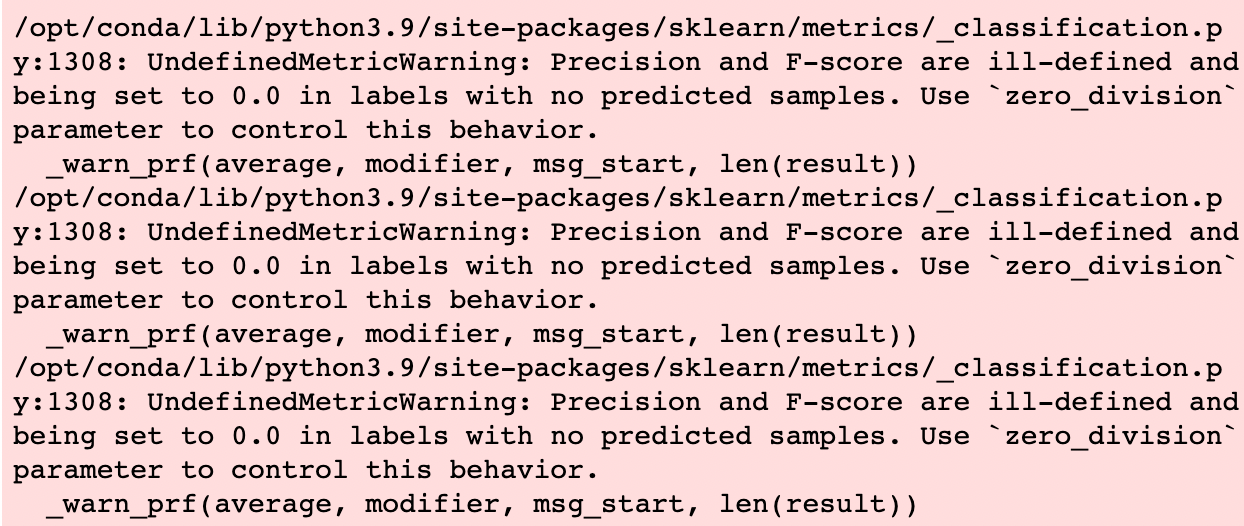